# Scripting languages: practical session 6

Wednesday, 15 November 2023

In this practical session, we'll look at text processing and exploratory text analysis. Some material presented in this notebook is based on previous tutorials by Folgert Karsdorp and Maarten Van Gompel.

First, we'll reload some of the functions that we programmed during the fourth practical session. They will be useful for continuing our exploratory text analysis of *the Stories of One Thousand and One Nights*. As a reminder: in practical session 4, we programmed a number of functions that allow us to extract the id (number) of each story from the filename. You can reload the functions by executing the code below.

In [2]:
from os.path import splitext
from os.path import basename
from glob import glob

def read_file(filename):
    with open(filename, encoding='utf8') as infile:
        contents = infile.read()
    return contents

def remove_ext(filename):
    root, ext = splitext(filename)
    return root

def remove_dir(filepath):
    return basename(filepath)

def remove_dir_ext(filepath):
    no_ext = remove_ext(filepath)
    base = remove_dir(no_ext)
    return base

def get_night(filepath):
    return int(remove_dir_ext(filepath))

Next, we'll download the necessary data, and unzip it. Remember, if you don't have `wget` on your computer (e.g. because you're working with windows) then you'll need to download the data manually using the web link.

In [ ]:
!wget http://ccl.kuleuven.be/Courses/scripting/scripting_practical6_data.zip

In [ ]:
!unzip scripting_practical6_data.zip

## Tokenization

Let's first make sure that our stories are properly tokenized. Up till now, we've mostly split our string on whitespace characters in order to detect word boundaries. During the lecture, we discussed why this is suboptimal. Moreover, splitting on whitespace characters does not tell us anything about sentence boundaries. We will therefore make use of the [NLTK](https://www.nltk.org/) library, which includes a simple tokenizer and sentence splitter for English. First, we will import the library, and we'll also download the model for sentence tokenization using the code below:

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jacmo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

If you're using Colab, `NLTK` should be readily available. If you're using Jupyter notebook on your own computer, you need to make sure to install the module (e.g. using Anaconda Navigator).

We will use the following code to do lower casing, punctuation elimination, tokenization, and sentence splitting with NLTK:

In [4]:
def tokenize_and_filter(sent):
    return [token.lower() for token in nltk.word_tokenize(sent)
           if token not in ".,?!:;()[]''``*"]

def preprocess(text):
    return [tokenize_and_filter(sent) for sent in nltk.sent_tokenize(text)]

The `tokenize_and_filter` function will process a single sentence. `nltk.word_tokenize` splits words and punctuation into separate tokens; for each resulting token, the lower-case version of tokens is used, and punctuation is filtered out.

The `preprocess` function takes a text as string and does all the processing on it. It first splits the text into a list of sentences with `nltk.sent_tokenize`. It returns the result as a list of sentences, which in turn are lists of tokens, tokenized and cleaned by `tokenize_sent`.

In [5]:
# Let's test the code:
preprocess('This is a sentence. Should we separate it from this one?')

[['this', 'is', 'a', 'sentence'],
 ['should', 'we', 'separate', 'it', 'from', 'this', 'one']]

In [6]:
# What about tricky cases? (This is a single string spread over several lines)
text = """She asked: "Is Dr. Phil a doctor?". "Dr. Phil has a
Ph.D. but is not an M.D." I replied. "He even lost
his license to practice therapy," I added."""

preprocess(text)

[['she', 'asked', 'is', 'dr.', 'phil', 'a', 'doctor'],
 ['dr.', 'phil', 'has', 'a', 'ph.d.', 'but', 'is', 'not', 'an', 'm.d'],
 ['i', 'replied'],
 ['he',
  'even',
  'lost',
  'his',
  'license',
  'to',
  'practice',
  'therapy',
  'i',
  'added']]

Note that for readability, your notebook will print long lists with one element per line.

We can now go back to our sorted list of filenames and read our corpus. We read each file, apply the preprocessing function to it, and collect the result in one big `corpus` list (this may take a minute!):

In [9]:
corpus = []
filenames = glob('arabian_nights/*.txt')
filenames = sorted(filenames, key=get_night)
for filename in filenames:
    text = read_file(filename)
    corpus.append(preprocess(text))

The `preprocess` function already returned two levels of lists (and strings), and now we added yet another level. Do you understand the meaning of each level? Try the following:

In [15]:
corpus[0]

[['in',
  'the',
  'name',
  'of',
  'allah',
  'the',
  'compassionating',
  'the',
  'compassionate'],
 ['praise',
  'be',
  'to',
  'allah',
  'the',
  'beneficent',
  'king',
  'the',
  'creator',
  'of',
  'the',
  'universe',
  'lord',
  'of',
  'the',
  'three',
  'worlds',
  'who',
  'set',
  'up',
  'the',
  'firmament',
  'without',
  'pillars',
  'in',
  'its',
  'stead',
  'and',
  'who',
  'stretched',
  'out',
  'the',
  'earth',
  'even',
  'as',
  'a',
  'bed',
  'and',
  'grace',
  'and',
  'prayer-blesslng',
  'be',
  'upon',
  'our',
  'lord',
  'mohammed',
  'lord',
  'of',
  'apostolic',
  'men',
  'and',
  'upon',
  'his',
  'family',
  'and',
  'companion',
  'train',
  'prayer',
  'and',
  'blessings',
  'enduring',
  'and',
  'grace',
  'which',
  'unto',
  'the',
  'day',
  'of',
  'doom',
  'shall',
  'remain',
  'amen'],
 ['o', 'thou', 'of', 'the', 'three', 'worlds', 'sovereign'],
 ['and', 'afterwards'],
 ['verily',
  'the',
  'works',
  'and',
  'words',
  

In [11]:
corpus[0][0]

['in',
 'the',
 'name',
 'of',
 'allah',
 'the',
 'compassionating',
 'the',
 'compassionate']

In [12]:
corpus[0][0][0]

'in'

In [13]:
corpus[0][0][0][0]

'i'

What does each of the levels in our nested list represent?

## Exploratory data analysis

As a first exploratory data analysis, we are going to compute for each night how many sentences it contains and how many words. It is quite easy to count the number of sentences per night, since each night is represented by a list of sentences.

In [16]:
sentences_per_night = []
for night in corpus:
    sentences_per_night.append(len(night))
print(sentences_per_night[:10])

[378, 113, 89, 82, 137, 61, 111, 92, 164, 156]


Using the function `max` we can find out what the highest number of sentences is:

In [17]:
max(sentences_per_night)

393

Similarly, if we would like to now what the lowest number of sentences is, we use the function `min`:

In [18]:
min(sentences_per_night)

5

### Exercise 1

By now, you've probably already figured out that the function `sum` takes a list of numbers as input, and returns the sum:

In [19]:
sum([1, 3, 3, 4])

11

**(1)** Use this function to compute the average number of sentences per night.

In [21]:
# insert your code here
Average_number_of_sentences_per_night = sum(sentences_per_night)/len(corpus)
Average_number_of_sentences_per_night

41.132132132132135

**(2)** Given our data structure of a list of sentences which are themselves lists of words, it is a little trickier to count for each night how many words it contains. How would you do this? Create a variable `words_per_night`, similar to the variable `sentences_per_night`, which contains the number of words for each night.

In [27]:
#insert your code here
words_per_night = []
for night in corpus:
    n_words = 0
    for sentence in night:
        n_words += len(sentence)
    words_per_night.append(n_words)

print(words_per_night[:10])

[11372, 3253, 2398, 2555, 4017, 1692, 3190, 2385, 4582, 4181]


The suspense created by Shahrazad’s story-telling skills is intriguing, especially the “cliff-hanger” ending each night which she uses to avert her own execution. Every night she tells the Sultan a story only to stop at dawn and she picks up the thread the next night. But does it really take the whole night to tell a particular story?

An average speaker speaks about 100--130 words per minute. Narrators are advised to use approximately 150 words per minute in audiobooks. Let's say that for live storytelling, it lies around 120 words per minute (including pauses). Using this information, we can compute the time it takes (in minutes) to tell a particular story as follows:

$$\textrm{story time}(\textrm{text}) = \frac{\textrm{number of words in text}}{\textrm{number of words per minute}}$$

### Exercise 2

**1)** Write a function called `story_time` that takes as input a text that has been tokenized and split into sentences (such as the nights in our corpus). Given a speed of 120 words per minute, compute how long it takes to recite that text.

In [38]:
def story_time(text):
    # insert your code here
    total_words = 0
    for sentence in text:
        total_words += len(sentence)
    return total_words/120
        

# these tests should return True if your code is correct
story = [['This', 'is', 'a', 'story', 'about', 'a', 'cat'], ['The', 'cat', 'is', 'on', 'the', 'mat']]
print(story_time(story) == 13 / 120)
print(story_time(corpus[0]) == 11372 / 120)

True
True


**2)** Compute the story_time (in minutes) for each night in our corpus. Assign the result to the variable `story_time_per_night`.

In [41]:
# insert your code here
story_time_per_night = [story_time(night) for night in corpus]
story_time_per_night[:10]

[94.76666666666667,
 27.108333333333334,
 19.983333333333334,
 21.291666666666668,
 33.475,
 14.1,
 26.583333333333332,
 19.875,
 38.18333333333333,
 34.84166666666667]

**3**) Compute the average, minimum and maximum story telling time.

In [43]:
# insert your code here
average_story_time = (sum(story_time_per_night))/len(corpus)
minimum_story_time = min(story_time_per_night)
maximum_story_time = max(story_time_per_night)

print(average_story_time, minimum_story_time, maximum_story_time )

10.363038038038026 2.533333333333333 94.76666666666667


### Visualizing general statistics

Now that we have computed a range of general statistics for our corpus, it would be nice to visualize them. Python's plotting library *matplotlib* (see [here](http://matplotlib.org)) allows us to produce all kinds of graphs. In addition to importing the library, we need to issue a special command to ensure that our plots will be displayed in the notebook:

In [44]:
import matplotlib.pyplot as plt

Now we can, for example, plot for each story how many sentences it contains:

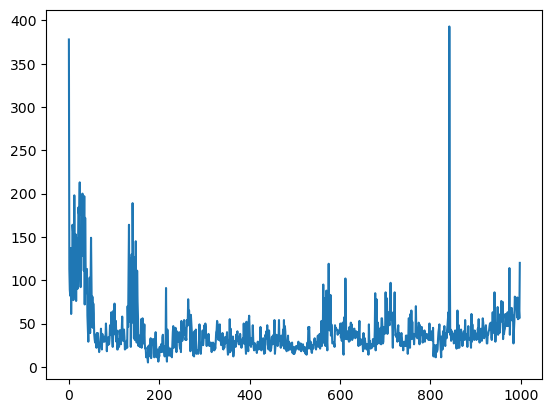

In [45]:
plt.plot(sentences_per_night)

### Exercise 3

**1)** Can you do the same for `words_per_night`?

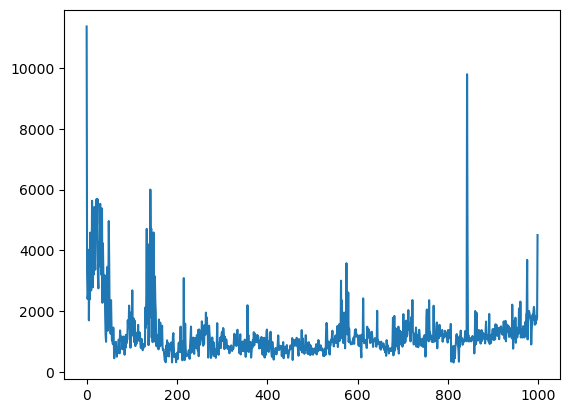

In [46]:
# insert your code here
plt.plot(words_per_night)

**2)** And can you do the same for `story_time_per_night`?

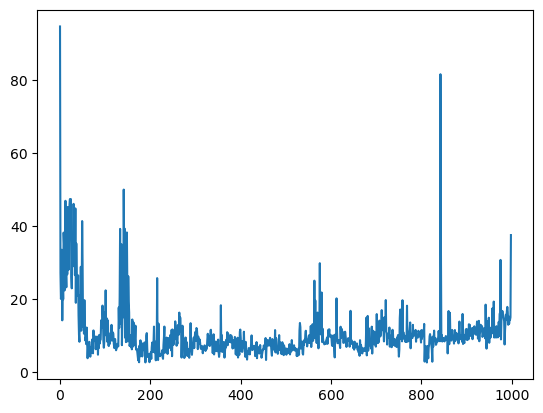

In [47]:
# insert your code here
plt.plot(story_time_per_night)

**3)** We now want to write a function `positions_of` that returns, for a given word, all sentence numbers in the *Arabian Nights* where that word occurs. We are not interested in the sentence number relative to a particular night, so keep track of sentence numbers for the whole corpus. Use that function to find all occurrences of the name *Sharahzad* and store the corresponding indices in the variable `positions_of_shahrazad`. Do the same thing for the name *Ali*. Store the result in `positions_of_ali`. Finally, find all occurrences of *Egypt* and store the indices in `positions_of_egypt`. Hint: to compute the position in the whole corpus, you will need keep track of a running total of sentences as you go through each night and sentence.

In [52]:
#insert your code here
def positions_of(word):
    list_of_positions = []
    current_position = 0
    for night in corpus:
        for sentence in night:
            for w in sentence:
                if w == word:
                    if current_position not in list_of_positions:
                        list_of_positions.append(current_position)
            # note that the following counter is defined at the level of the
            # sentence, and will thus increase for each sentence in the corpus
            current_position += 1
    return list_of_positions

positions_of_shahrazad = positions_of('shahrazad')
positions_of_ali = positions_of('ali')
positions_of_egypt = positions_of('egypt')

If everything went well, the following lines of code should produce a [dispersion plot](https://medium.com/the-political-ear/tutorial-plotting-lexical-dispersion-conspiracy-lies-from-the-left-of-center-c0b39de442d5) of all sentence occurrences of Shahrazad, Ali and Egypt in the corpus.

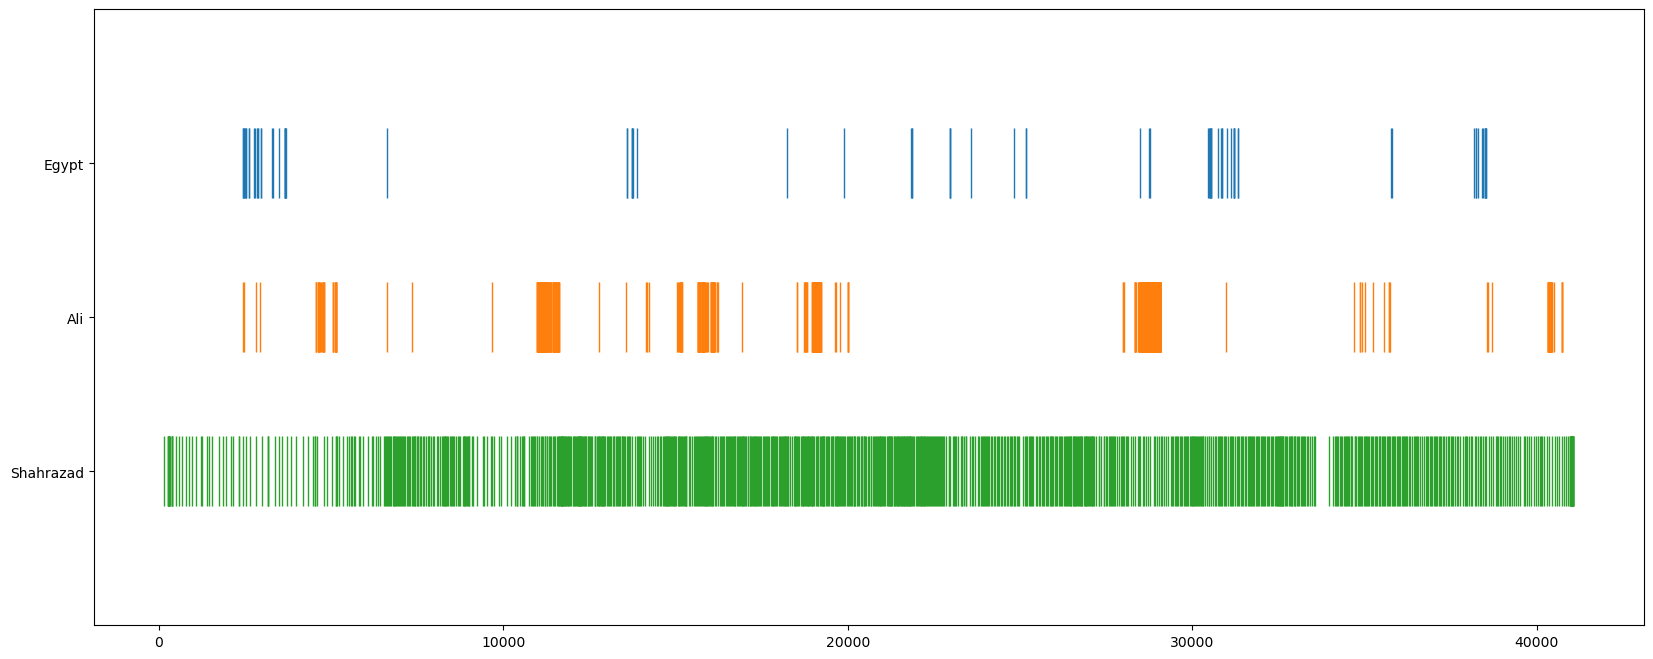

In [53]:
plt.figure(figsize=(20, 8))
names = ['Shahrazad', 'Ali', 'Egypt']
plt.plot(positions_of_egypt, [2] * len(positions_of_egypt), '|', markersize=50)
plt.plot(positions_of_ali, [1] * len(positions_of_ali), '|', markersize=50)
plt.plot(positions_of_shahrazad, [0] * len(positions_of_shahrazad), '|', markersize=50)
plt.yticks(range(len(names)), names)
plt.ylim(-1, 3);

On the x-axis, the absolute sentence number within the corpus is indicated; and each vertical bar indicates a position where the target word occurs.

> Then Shahrazad reached the morning, and fell silent in the telling of her tale…

## Collocations

In the next part of this practical session, our aim is to automatically come up with a list of collocations that are present in (an excerpt from) the English Wikipedia. As we've seen during the lecture, collocations are word combinations that appear together much more frequently than one would expect based on their individual frequencies (e.g. *red wine* is a collocation, because *red wine* as a combination appears much more frequent than one would expect based on the frequencies of *red* and *wine* individually.

For our analysis, we'll first make sure that our wikipedia corpus is properly tokenized. Additionally we'll also remove stop words from our data (stop words are very frequent words, such as *the* and *it*, which are often filtered out in particular NLP applications; in this case, we want to filter them out because they are unlikely to be part of collocations).

Let's first make sure that our list of English stopwords is downloaded, so that we can make use of it in `NLTK`. We'll also make sure that our `NLTK`'s stopword functionality is properly loaded by importing the proper module.

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jacmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Next, we'll read in our Wikipedia text file, and tokenize it using the `tokenize_and_filter` function we defined before. Note that we're not using the `preprocess` function, because we want all our tokens in a single list, not separated per sentence.

In [6]:
wiki_string = read_file('wiki/wiki_sample_en_small.txt')
wiki_tokens = tokenize_and_filter(wiki_string)

### Exercise 4

Using `stopwords.word('english')`, you can now access a list of stopwords in English. Create a novel variable `wiki_tokens_filtered`, which has all the stopwords filtered out.



In [ ]:
# insert your code here
wiki_tokens_filtered = [token for token in wiki_tokens
                        if not token in stopwords.words('english')]

Let's now make sure that `NLTK`'s collocation functionality is properly loaded. We'll make use of `BigramAssocMeasures`, which contains the actual collocation measures, and `BigramCollocationFinder`, which we'll use to construct word pairs (together with their frequencies) from our text.

In [ ]:
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
bigram_measures = BigramAssocMeasures()

We can now make use of the `from_words` method of the `BigramCollocationFinder` class in order to automatically construct a set of word pairs and their frequencies from the data. This data can then be explored using a number of collocation measures, all implemented in nltk (defined in the `BigramAssocMeasures` class).

In [ ]:
finder = BigramCollocationFinder.from_words(wiki_tokens_filtered)

First we'll apply a frequency filter; this means we're only keeping candidate collocations that appear with a frequency of at least $n$ (3 in this case):

In [ ]:
finder.apply_freq_filter(3)

Next, we'll select those word pairs that have the highest collocation score (in this case, we're using the raw frequency, i.e. `raw_freq`, as a score.

In [ ]:
finder.nbest(bigram_measures.raw_freq, 20)

### Exercise 5

You might have noticed that raw frequency is not the best possible collocation measure. Inspect the `BigramAssocMeasures` class in
order to learn what other measures are available. Experiment with a
number of those measures and inspect the results. Which measures
work best? Hint: you can always get more information for a particular module or function by typing `help(module)`, i.e. `help(BigramAssocMeasures)` in this case. You'll also find some more information about possible measures implemented in `NLTK` on the internet.

In [ ]:
# insert your code here


Note: some measures tend to overestimate infrequent collocations. Make sure to jointly experiment with the frequency threshold, and check which threshold works best for what measure.

## Spacy

Finally, we'll experiment with Spacy's preprocessing pipeline. First, we'll import `spacy`. This should work out of the box in Google Colab. If you're doing this practical session on your own notebook, and you haven't installed spacy before, you will need to install it (e.g. using the anaconda navigator).

In [ ]:
import spacy

Next, we'll load the preprocessing models for English. Again, this will work out of the box on Google Colab. If you're working locally, you will need to make sure to download the English model files as well. The error message will tell you how to do so. You can find more information on Spacy's [Models & Languages page](https://spacy.io/usage/models).

In [ ]:
nlp = spacy.load('en_core_web_sm')

Now we're ready to start preprocessing text. Let's see how well Spacy does on a random newspaper article. Copy a news article from your favourite English news website (e.g. [The Guardian](https://www.theguardian.com/international)), and paste it in the code cell below (make sure you leave the triple punctuation marks, as we're defining a multi-line string here):

In [ ]:
news_article = """
COPY YOUR ARTICLE HERE
"""

We can now give our news article (defined as a string of characters) to spacy's processing pipeline, using the code below. The article, together with all preprocessing annotations, will be put in the `doc` variable.

In [ ]:
doc = nlp(news_article)

### Exercise 6

Explore the various annotations that are provided by the preprocessing: explore the results of the tokenization, the sentence detection, and the lemmatization. As you go through the results you're likely to notice that the results contain some errors - or things that you would have annotated differently. It's important to realize that this will always be the case: the preprocessing pipeline is an automatic process, and the final results are likely to contain some errors.

In [ ]:
#insert your code here
